# The `QuantumState` class

Express an N-qubit quantum state as an array of N columns, where rows are binary bit values, complemented by a vector of coefficients. Note the similarity with the symplectic representation - indeed, the QuantumState class will infact set the above array as the X block in a PauliwordOp, with the Z block its complement.

What we are doing here is writing $|0\rangle = Z|0\rangle$ and $|1\rangle = X|0\rangle$, which ensures correct phases when multiplying the state by Pauli operators, since

$$X|0\rangle = XZ|0\rangle = -iY|0\rangle = |1\rangle,\; X|1\rangle = XX|0\rangle = |0\rangle$$
$$Y|0\rangle = YZ|0\rangle = iX|0\rangle = i|1\rangle,\; Y|1\rangle = YX|0\rangle = -iZ|0\rangle = -i|0\rangle$$
$$Z|0\rangle = ZZ|0\rangle = |0\rangle,\; Z|1\rangle = ZX|0\rangle = iY|0\rangle = -|1\rangle$$

Finally, we have $$| \vec{b} \rangle = \bigotimes_{i=1}^N \big(b_i X + (1-b_i) Z\big) | \vec{0} \rangle$$ and we may drop the zero vector and use the functionality of PauliwordOp to manipulate quantum states. In this represenation, a quantum state is stored as an operator consisting of Paulis $X, Z$, which is implicitly applied to the zero (or vacuum) state. 

In [21]:
import numpy as np
from symmer.symplectic import PauliwordOp, QuantumState

Firstly, note the correct phases under multiplication by a Pauli Y:

In [22]:
zero = QuantumState([[0]])
one = QuantumState([[1]])
Y = PauliwordOp.from_list(['Y'], [1])

print(f'{zero} -> {Y * zero}')
print(f'{one} -> {Y * one}')

 1.000+0.000j |0> ->  0.000+1.000j |1>
 1.000+0.000j |1> ->  0.000-1.000j |0>


Now, let's see what happens when we apply the Hadamard gate to the zero state:

In [23]:
from symmer.evolution import Had
psi = QuantumState([[0,0]])
H = Had(1, 0)
HH = H.tensor(H)
eq_superposition = HH * psi
print(f'Zero state: {psi}\n')
print(f'After application of a Hadamard gate on each qubit position:\n\n{eq_superposition}')

Zero state:  1.000+0.000j |00>

After application of a Hadamard gate on each qubit position:

 0.500+0.000j |00> +
 0.500+0.000j |01> +
 0.500+0.000j |10> +
 0.500-0.000j |11>


Observe that the QuantumState is represented internally by its `state_op`, a PauliwordOp object that governs its behaviour under multiplication

In [24]:
print(eq_superposition.state_op)

 0.500+0.000j ZZ +
 0.500+0.000j ZX +
 0.500+0.000j XZ +
 0.500-0.000j XX


Try evaluating expectation values for randomly generated states and Hermitian operators:

In [25]:
N = 5 # number of qubits
M = 10 # number of terms

psi_1 = QuantumState.random_state(N, M)
psi_2 = QuantumState.random_state(N, M)

print(psi_1)
print()
print(psi_2)

 0.236+0.024j |01011> +
 0.221+0.270j |10001> +
 0.112+0.245j |10001> +
 0.144+0.300j |10110> +
 0.188+0.324j |11000> +
 0.292+0.235j |11001> +
 0.076+0.306j |01110> +
 0.063+0.074j |01011> +
 0.207+0.201j |10000> +
 0.322+0.249j |10010>

 0.209+0.121j |11110> +
 0.210+0.298j |01010> +
 0.055+0.066j |11010> +
 0.289+0.319j |11111> +
 0.242+0.344j |11111> +
 0.020+0.218j |11111> +
 0.263+0.076j |01001> +
 0.308+0.179j |11001> +
 0.317+0.217j |10100> +
 0.196+0.048j |10111>


In [26]:
psi = (psi_1 + psi_2).normalize
print(psi)
print()
print('Norm:', psi.dagger * psi)

 0.148+0.043j |01001> +
 0.118+0.168j |01010> +
 0.168+0.055j |01011> +
 0.043+0.172j |01110> +
 0.117+0.113j |10000> +
 0.187+0.291j |10001> +
 0.181+0.140j |10010> +
 0.178+0.122j |10100> +
 0.081+0.169j |10110> +
 0.110+0.027j |10111> +
 0.106+0.183j |11000> +
 0.338+0.233j |11001> +
 0.031+0.037j |11010> +
 0.118+0.068j |11110> +
 0.311+0.497j |11111>

Norm: (0.9999999999999999+0j)


We may also generate haar-random states, although this is more computationally expensive due to an internal QR-decomposition.

In [27]:
psi = QuantumState.haar_random(N)
print(psi)

-0.009+0.044j |00000> +
-0.036-0.036j |00001> +
-0.093+0.027j |00010> +
 0.306+0.094j |00011> +
 0.182-0.058j |00100> +
 0.058+0.059j |00101> +
 0.256+0.302j |00110> +
 0.188-0.128j |00111> +
-0.064-0.104j |01000> +
 0.215-0.025j |01001> +
 0.146+0.247j |01010> +
-0.208-0.058j |01011> +
-0.031-0.014j |01100> +
-0.072-0.038j |01101> +
-0.044-0.022j |01110> +
-0.257+0.020j |01111> +
 0.096+0.078j |10000> +
 0.098+0.068j |10001> +
-0.004-0.041j |10010> +
 0.172-0.006j |10011> +
 0.110-0.157j |10100> +
 0.144-0.136j |10101> +
 0.059+0.147j |10110> +
-0.103+0.125j |10111> +
-0.034+0.005j |11000> +
-0.041+0.155j |11001> +
 0.103-0.003j |11010> +
-0.289-0.012j |11011> +
 0.029+0.077j |11100> +
 0.115-0.070j |11101> +
-0.091+0.124j |11110> +
 0.075-0.039j |11111>


In [28]:
print('Generate a random Hermitian operator:\n')
op = PauliwordOp.random(N, 10, complex_coeffs=False)
print(op)
print()
print('Expectation value <psi|op|psi> =', (psi.dagger * op * psi).real)

Generate a random Hermitian operator:

 1.118+0.000j YZXYZ +
 0.222+0.000j ZIZIX +
 0.675+0.000j XXIYX +
-2.429+0.000j ZZXXI +
 0.131+0.000j ZZZZZ +
-1.408+0.000j ZYXYY +
-0.834+0.000j YXIZX +
 1.586+0.000j ZIYYI +
-1.057+0.000j ZZYXY +
 1.316+0.000j YIZIY

Expectation value <psi|op|psi> = 0.4313721369770473


It is also possible to convert from a $2^N$ dimensional statevector over $N$ qubits to a `QuantumState` object, via the `from_array` initialization method:

In [29]:
statevector = np.zeros(2**10).reshape([-1,1])
statevector[0]   = np.sqrt(1/6)
statevector[250] = np.sqrt(2/6)
statevector[500] = np.sqrt(3/6)
psi = QuantumState.from_array(statevector)
print(psi)
print(psi.dagger * psi)

 0.408+0.000j |0000000000> +
 0.577+0.000j |0011111010> +
 0.707+0.000j |0111110100>
(1+0j)


# Manipulating Quantum Measurement Data

Given a dictionary of measurement outcomes from a quantum experiment, we may intialize a QuantumState for further postprocessing.

- Dictionary given as: 
    - key=bitstring
    - value=number of occurences or relative frequency

In [30]:
measurement_data = {
    '0101':4,
    '1101':10,
    '0001':20,
    '1111':16
}

psi_measured = QuantumState.from_dictionary(measurement_data)
psi_measured

 4.000+0.000j |0101> +
 10.000+0.000j |1101> +
 20.000+0.000j |0001> +
 16.000+0.000j |1111>

The coefficients here are the number of occurences of each output bitstring. These may be normalized using `normalize_counts` to ensure the correct probability distrubution is preserved:

 0.283+0.000j |0101> +
 0.447+0.000j |1101> +
 0.632+0.000j |0001> +
 0.566+0.000j |1111>


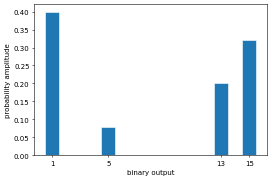

In [31]:
print(psi_measured.normalize_counts)
ax = psi_measured.normalize_counts.plot_state(dpi=50)

This is __not__ the same as taking the $L^2$-norm - the probability distrubtions do not align.

 0.144+0.000j |0101> +
 0.360+0.000j |1101> +
 0.720+0.000j |0001> +
 0.576+0.000j |1111>


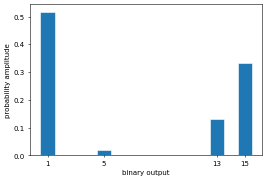

In [32]:
print(psi_measured.normalize)
# this shouldn't be used for normalizing quantum experiment data
# ... but functionality is still useful for normalizing states in the general setting
ax = psi_measured.normalize.plot_state(dpi=50)

# State sampling

It is also possible to randomly sample the state, just like a quantum experiment - this is particularly useful for the purposes of bootstrapping for statistical analysis of quantum experiments.

In [33]:
psi_measured_normalized = psi_measured.normalize_counts
psi_measured_normalized.sample_state(n_samples=50, return_normalized=True)

 0.200+0.000j |0101> +
 0.447+0.000j |1101> +
 0.529+0.000j |0001> +
 0.693+0.000j |1111>

Given enough samples, the original state will be reproduced exactly:

In [34]:
for n_samples in 2**np.arange(0, 30, 2):
    psi_sampled = psi_measured_normalized.sample_state(n_samples=n_samples, return_normalized=True)
    print(f'With n_samples={n_samples: <10}, <psi_sampled|psi_true> = {psi_sampled.dagger * psi_measured_normalized}')

With n_samples=1         , <psi_sampled|psi_true> = (0.565685424949238+0j)
With n_samples=4         , <psi_sampled|psi_true> = (0.9536631057245559+0j)
With n_samples=16        , <psi_sampled|psi_true> = (0.9785368169228137+0j)
With n_samples=64        , <psi_sampled|psi_true> = (0.9880094617859954+0j)
With n_samples=256       , <psi_sampled|psi_true> = (0.9979956122926343+0j)
With n_samples=1024      , <psi_sampled|psi_true> = (0.9996961647743783+0j)
With n_samples=4096      , <psi_sampled|psi_true> = (0.9999363594211486+0j)
With n_samples=16384     , <psi_sampled|psi_true> = (0.9999952211731546+0j)
With n_samples=65536     , <psi_sampled|psi_true> = (0.999992069869821+0j)
With n_samples=262144    , <psi_sampled|psi_true> = (0.9999998393622556+0j)
With n_samples=1048576   , <psi_sampled|psi_true> = (0.9999992981791623+0j)
With n_samples=4194304   , <psi_sampled|psi_true> = (0.9999999843659798+0j)
With n_samples=16777216  , <psi_sampled|psi_true> = (0.9999999898761083+0j)
With n_samples

# Plotting probabillity amplitudes of quantum state

In [35]:
%matplotlib inline
random_state = QuantumState.haar_random(3, vec_type='ket')
print(random_state)

 0.067+0.238j |000> +
 0.307-0.022j |001> +
 0.314-0.032j |010> +
-0.070+0.090j |011> +
 0.091-0.128j |100> +
-0.064-0.075j |101> +
 0.227+0.551j |110> +
-0.197-0.550j |111>


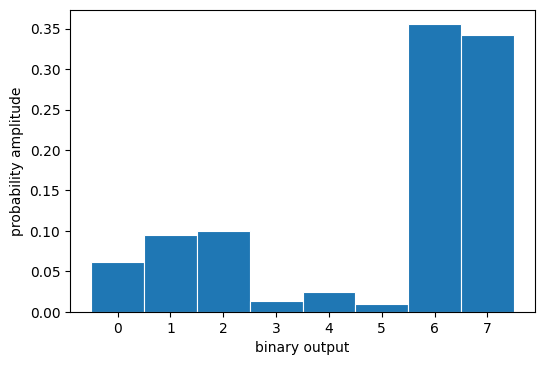

In [36]:
ax = random_state.plot_state(dpi=100)

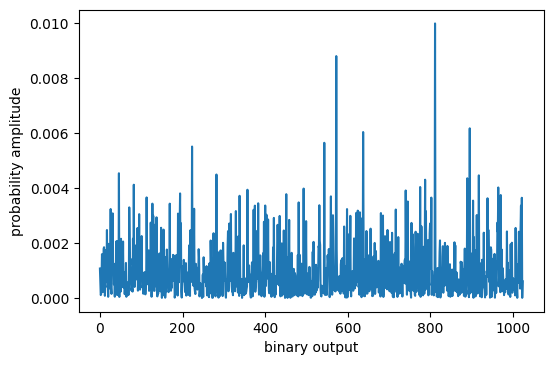

In [37]:
%matplotlib inline
random_large_state = QuantumState.haar_random(10, vec_type='ket')
ax2 = random_large_state.plot_state(logscale=False)

<AxesSubplot:xlabel='binary output', ylabel='probability amplitude'>

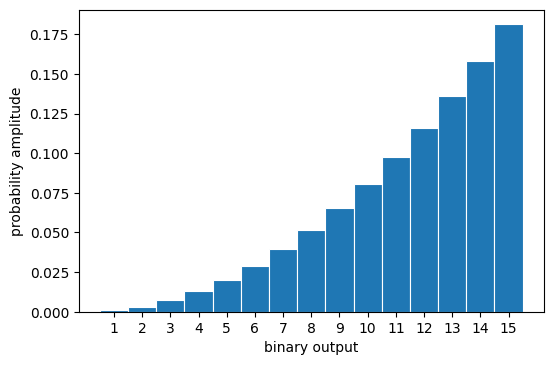

In [38]:
a = np.arange(2**4)
a = a/np.linalg.norm(a)
psi = QuantumState.from_array(a.reshape([-1,1]))
psi.plot_state()

<AxesSubplot:xlabel='binary output', ylabel='probability amplitude'>

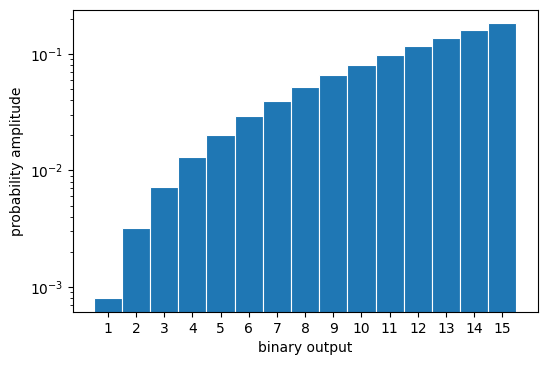

In [39]:
psi.plot_state(logscale=True)

<AxesSubplot:xlabel='binary output', ylabel='probability amplitude'>

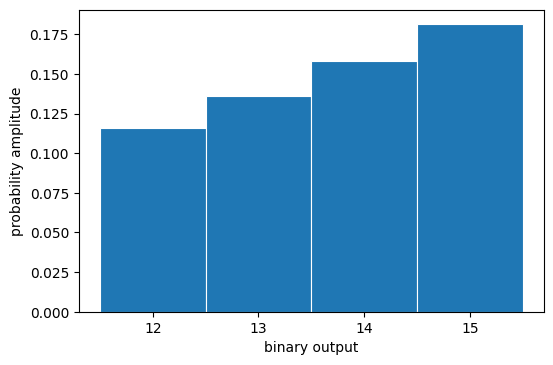

In [40]:
psi.plot_state(probability_threshold=0.1)